Make neccesary imports

In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np




### Non-Linear Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt

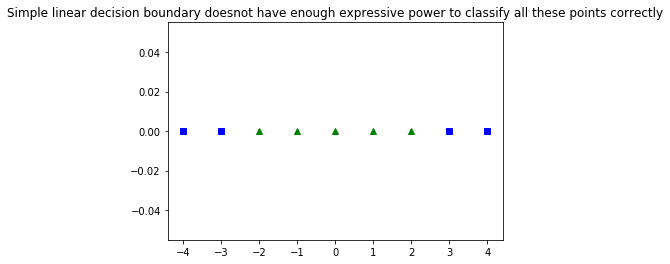

In [29]:
X1D = np.linspace(-4, 4, 9)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
plt.plot(X1D[y==0], np.zeros(4), "bs")
plt.plot(X1D[y==1], np.zeros(5), "g^")



In [42]:
from sklearn.svm import SVC, LinearSVC
clf = SVC(kernel='linear').fit(X1D.reshape(-1,1), y)

In [39]:
clf.coef_[0][0]

0.0

In [38]:
clf.intercept_[0]

1.0

Thus decision boundary look like y= 1

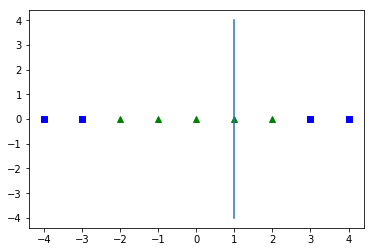

In [41]:
X1D = np.linspace(-4, 4, 9)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
plt.plot(X1D[y==0], np.zeros(4), "bs")
plt.plot(X1D[y==1], np.zeros(5), "g^")
plt.plot(np.ones(X1D.shape), X1D )


Simple linear decision boundary doesnot have enough expressive power to classify all these points correctly.
So,we Transform the input data from a 1-dimensional space to 2-dimensional spac like shown below:

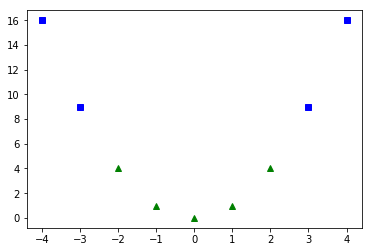

In [58]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0] , "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1] , "g^")

clf = SVC(kernel = 'linear').fit(X2D, y)


In [62]:
b= clf.intercept_[0]

In [63]:
w0= clf.coef_[0][0]
w1 = clf.coef_[0][1]

In [64]:
# feature 2
x1 = -(w0/w1)*X1D-(b/w1)

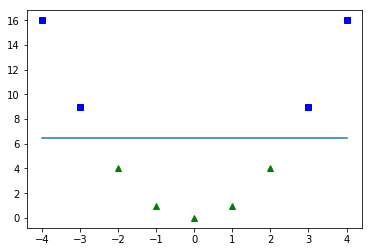

In [66]:
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0] , "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1] , "g^")
plt.plot(X1D, x1 )

The data transformation makes it possible to solve with the help of linear classifiers.

### Let's  solve another Non-linear classification problem

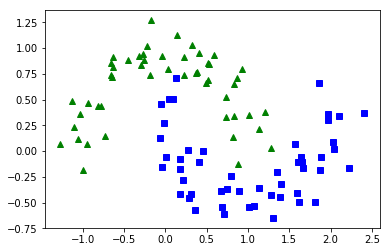

In [114]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples= 100, noise= 0.15, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")



In [182]:
def plot_predictions(clf, X, poly = False):
    feature1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    feature2 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    x0, x1 = np.meshgrid(feature1, feature2)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    if poly:
        X_new = PolynomialFeatures(degree=3).fit_transform(X_new)
    y_pred = clf.predict(X_new).reshape(x0.shape)
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

### a. Linear Support Vector classifier

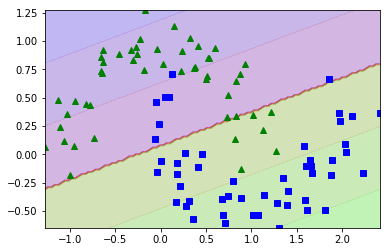

In [193]:
svm_clf = LinearSVC(C=10, loss="hinge", random_state=42)
svm_clf.fit(X, y)
plot_predictions(svm_clf, X)


### b. Linear Support Vector classifier with polynomial features

In [194]:
from sklearn.preprocessing import PolynomialFeatures


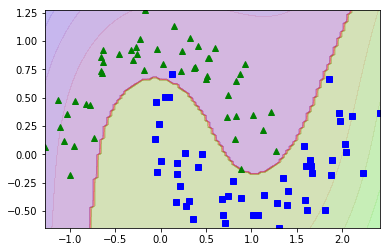

In [195]:
X_poly = PolynomialFeatures(degree=3).fit_transform(X)
svm_clf.fit(X_poly, y)
plot_predictions(svm_clf, X, True)

### c. Linear Support Vector classifier with polynomial features scaled version

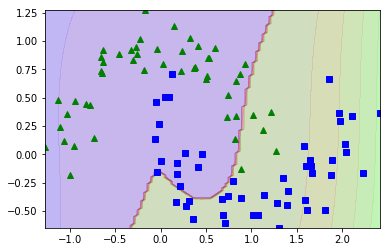

In [197]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit(X_poly)
X_poly_scaled=x.transform(X_poly)
svm_clf.fit(X_poly_scaled, y)
plot_predictions(svm_clf, X,  True)




### Combining Steps [a+b+c] using Pipeline

In [198]:
from sklearn.pipeline import Pipeline


In [199]:
Pipeline?

In [200]:
poly_svm_clf = Pipeline([
    ("X_poly", PolynomialFeatures(degree= 3)),
    ("X_poly_scaled", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

In [201]:
poly_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('X_poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('X_poly_scaled', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

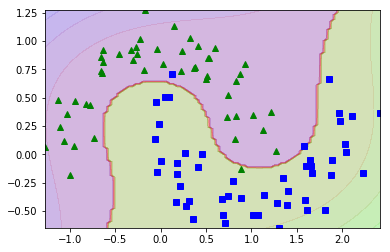

In [202]:
plot_predictions(poly_svm_clf, X)

### Performance of SVM as we tune γ and C:
* Gamma controls how far the influence of single training examples reaches, which turn affects how tightly decision boundaries end up surrounding the points.
* C is inverse of regularization, thus more is C, less will be regularization, which in turns makes it important to classify each data point correctly. 

In [203]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000



In [211]:
def Check_perfomance(gamma_, C_):
    rbf_kernel_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "rbf", gamma= gamma_, C = C_))
    ])

    rbf_kernel_svm.fit(X, y)
    plot_predictions(rbf_kernel_svm, X)
    plt.title('Gamma ={0} and C={1}'.format(gamma_, C_))

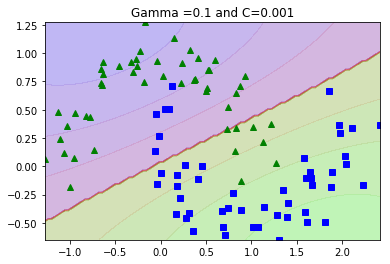

In [212]:
Check_perfomance(gamma1, C1)

Very Small Inverse Regularization parameter C leads to Regularizing Model to great extent, which in turn the underfitting.

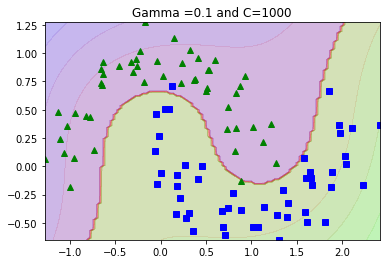

In [213]:
Check_perfomance(gamma1, C2)

Very Large Inverse Regularization parameter C NOT  Regularizing Model model at all, which in turn the leads overfitting the training set.   


Now lets increase gamma

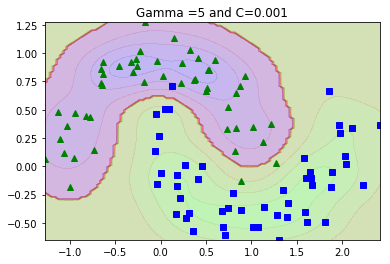

In [214]:
Check_perfomance(gamma2, C1)

Increased gamma has effect of how tightly decison boundary end up surrounding the points
Whereas very small C  prevents the model from overfitting by regularizing

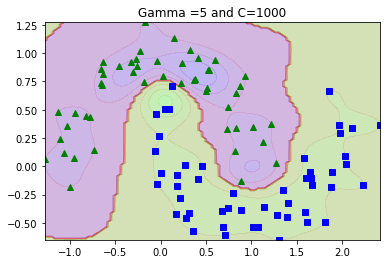

In [215]:
Check_perfomance(gamma2, C2)

Again, Increased gamma has effect of how tightly decison boundary end up surrounding the points
On the other very large C, eliminates regularization, that leads to overfitting.

# Support Vector Regresssion

Hyper Plane: In SVM this is basically the separation line between the data classes. Although in SVR we are going to define it as the line that will will help us predict the continuous value or target value



Idea: Find a Decision Boundary at some distance(Let say e) from the original hyperplane  
such that 
data points closest to the hyperplane(support vectors)  are within boundary lines.


Decision boundary is margin of tolerance that we're going to take only those points who are within this boundary.

#### LSVR: Linear Support Vector Regression

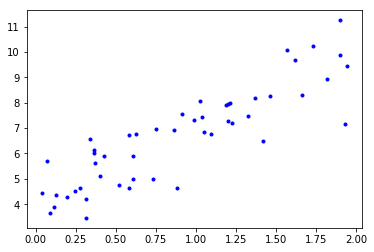

In [278]:
np.random.seed(42)
X = 2*np.random.rand(50, 1)
y = (3*X+4+np.random.randn(50, 1)).ravel()
plt.plot(X, y, "b.")

In [222]:
from sklearn.svm import LinearSVR


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [267]:
def svr(e):
    svm_reg = LinearSVR(epsilon=e, random_state=42)
    svm_reg.fit(X, y)
    x0 = np.linspace(np.min(X), np.max(X), 100)
    x1 = svm_reg.predict(x0.reshape(-1, 1))
    plt.scatter(X, y)
    plt.plot(x0, x1)
    plt.plot(x0, x1+svm_reg.epsilon, "k--")
    plt.plot(x0, x1-svm_reg.epsilon, "k--")






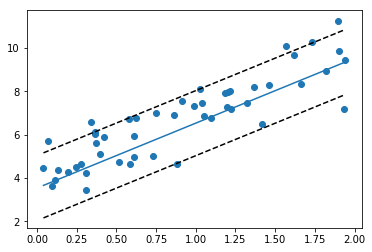

In [268]:
svr(1.5)

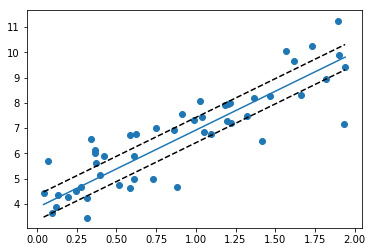

In [269]:
svr(0.5)

#### Polynomial Support Vector Regression

In [286]:
from sklearn.svm import SVR

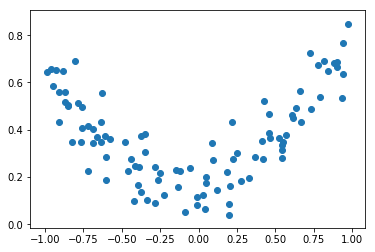

In [287]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

plt.scatter(X, y)

In [292]:
def plot_svr_poly(e, C):
    svr_reg_poly = SVR(kernel= 'poly', degree= 2, epsilon= e, C =C, gamma= "auto")
    svr_reg_poly.fit(X,y)
    x0 = np.linspace(np.min(X), np.max(X), 100)
    x1 = svr_reg_poly.predict(x0.reshape(-1, 1))
    plt.scatter(X, y)
    plt.plot(x0, x1)
    plt.plot(x0, x1+svr_reg_poly.epsilon, "k--")
    plt.plot(x0, x1-svr_reg_poly.epsilon, "k--")




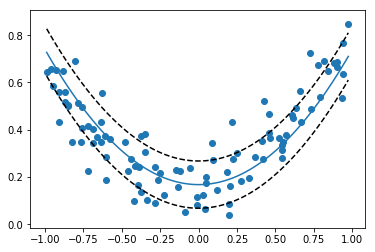

In [295]:
plot_svr_poly(0.1, 100)

In [ ]:
Higher Value of C leads to unregularized model whereas smaller value of C leads overly regularized model.

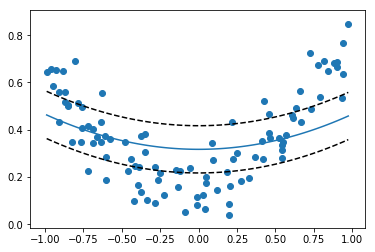

In [297]:
plot_svr_poly(0.1, 0.01)